# Perspective API Exploration

Hypothesis: The use of exclamation marks in the comment list will lead to a higher score due to the greater intensity of words.

In [68]:
#import libraries/programs
import matplotlib.pyplot as plt 
import pandas as pd
import time

In [69]:
df = pd.read_csv('labeled_and_scored_comments.csv')

In [70]:
df.sort_values(['score'])

,id,comment_text,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
1158,61a85266de70cca0,Можешь говорить по русски.,0.000004,0,0,0,0,0,0
5246,030a9ba0b32b4456,Rodzina Krusenstern Potomkowie Admirała Adama ...,0.000009,0,0,0,0,0,0
11040,a6814193ac6b4705,The opening paragraph states that the game is ...,0.000091,0,0,0,0,0,0
24192,f0d6dee96e057a5b,The book is used as a source in a number of ar...,0.000116,0,0,0,0,0,0
2332,cbb9268d3c7429c1,Vals Vienés \n |Rumba \n |Cha Cha Chá(ciclo 7),0.000131,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
19994,1429a2c930688317,you fucking piece of shit,0.997278,1,1,1,0,1,0
28728,d82e45eb103ad07b,fuck off you stupid aspy asshole,0.997736,1,1,1,0,1,0
25535,e9b92c6c6b01aeef,FUCK YOU YOU PIECE OF SHIT \n FUCK YOU YOU PIE...,0.997982,1,1,1,0,1,0
25945,e783fd267f3a9d3b,FUCK WIKIPEDIA ON WHEELS! \n\nFuck off wikiped...,0.998136,1,1,1,0,1,0


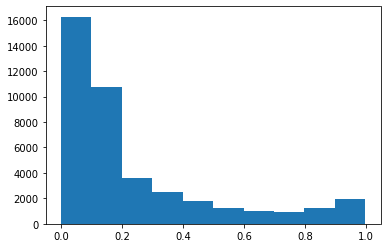

In [71]:
plt.hist(df['score'])
plt.show()

In [72]:
sub_df = df.loc[df['toxic']**1]
sub_df

,id,comment_text,score,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0001ea8717f6de06,Thank you for understanding. I think very high...,0.075638,0,0,0,0,0,0
0,0001ea8717f6de06,Thank you for understanding. I think very high...,0.075638,0,0,0,0,0,0
0,0001ea8717f6de06,Thank you for understanding. I think very high...,0.075638,0,0,0,0,0,0
0,0001ea8717f6de06,Thank you for understanding. I think very high...,0.075638,0,0,0,0,0,0
0,0001ea8717f6de06,Thank you for understanding. I think very high...,0.075638,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1,000247e83dcc1211,:Dear god this site is horrible.,0.450459,0,0,0,0,0,0
0,0001ea8717f6de06,Thank you for understanding. I think very high...,0.075638,0,0,0,0,0,0
0,0001ea8717f6de06,Thank you for understanding. I think very high...,0.075638,0,0,0,0,0,0
0,0001ea8717f6de06,Thank you for understanding. I think very high...,0.075638,0,0,0,0,0,0


In [73]:
from googleapiclient.discovery import build
import json

In [74]:
def get_toxicity_score(comment):
  API_KEY = '' # MY API key
    
  client = build("commentanalyzer", "v1alpha1", developerKey=API_KEY, discoveryServiceUrl = "https://commentanalyzer.googleapis.com/$discovery/rest?version=v1alpha1", static_discovery=False)
  analyze_request = {'comment': { 'text': comment },'requestedAttributes': {'TOXICITY': {}}}   
  response = client.comments().analyze(body=analyze_request).execute()
  toxicity_score = response["attributeScores"]["TOXICITY"]["summaryScore"]["value"]
                     
  return toxicity_score

In [75]:
comment_list = ['no bitch', 'fuck off', 'hell no']

for comment in comment_list:
    score = get_toxicity_score(comment)
    print(comment, score)
    time.sleep(1)

no bitch 0.94992846
fuck off 0.9885203
hell no 0.33025458


In [80]:
def get_toxicity_score2(comment):
  API_KEY2 = '' # MY API key
    
  client2 = build("commentanalyzer", "v1alpha1", developerKey=API_KEY2, discoveryServiceUrl = "https://commentanalyzer.googleapis.com/$discovery/rest?version=v1alpha1", static_discovery=False)
  analyze_request2 = {'comment': { 'text': comment },'requestedAttributes': {'TOXICITY': {}}}   
  response2 = client2.comments().analyze(body=analyze_request2).execute()
  toxicity_score2 = response2["attributeScores"]["TOXICITY"]["summaryScore"]["value"]
                     
  return toxicity_score2

In [82]:
comment_list2 = ['no bitch!!', 'fuck off!!', 'hell no!!']

for comment in comment_list2:
    score = get_toxicity_score2(comment)
    print(comment, score)
    time.sleep(1)

no bitch!! 0.95346254
fuck off!! 0.9869635
hell no!! 0.4893326


In conclusion, an exclamation mark has varying impacts on swear words, but it mainly increases its toxicity score.